In [1]:
#Please execute this cell
import sys;
sys.path.append('../../'); 
import jupman;


# Graph algorithms


## [Download exercises zip](../../_static/graph-algos-exercises.zip) 
(before editing read whole introduction section 0.x)

[Browse files online](https://github.com/DavidLeoni/datasciprolab/tree/master/exercises/graph-algos)



### What to do

- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-other stuff ...
-exercises
     |-graph-algos
         |- graph-algos.ipynb         
         |- graph_exercise.py
         |- graph_solution.py
         |- other stuff ..
```


- open the editor of your choice (for example Visual Studio Code, Spyder or PyCharme), you will edit the files ending in `_exercise.py` files
- Go on reading this notebook, and follow instuctions inside.


## Introduction


### 0.1 Graph theory

In short, a graph is a set of vertices linked by edges. 

Longer version:

* Alberto Montresor theory here: http://disi.unitn.it/~montreso/sp/handouts/B04-grafi.pdf
* [Graphs on the book](https://interactivepython.org/runestone/static/pythonds/Graphs/toctree.html)
    * In particular, see [Vocabulary and definitions](https://interactivepython.org/runestone/static/pythonds/Graphs/VocabularyandDefinitions.html)




### 0.2 Directed graphs

In this worksheet we are going to use so called Directed Graphs (`DiGraph` for brevity), that is, graphs with _directed_ edges: each edge can be pictured as an arrow linking source node _a_ to target node _b_.  With such an arrow, you can go from _a_ to _b_ but you cannot go from _b_ to _a_ unless there is another edge in the reverse direction. 

* `DiGraph` for us can also have no edges or no verteces at all. 
* Verteces for us can be anything, strings like _'abc'_, numbers like _3_, etc 
* In our model, edges simply link vertices and have no weights
* `DiGraph` is represented as an adjacency list, mapping each vertex to the verteces it is linked to.

<div class="alert alert-info">

**QUESTION**: is `DiGraph` model good for dense or sparse graphs?
</div>

### 0.3 Serious graphs

In this worksheet we follow the _Do It Yourself_ methodology and create graph classes from scratch for didactical purposes. Of course, in Python world you have alread nice libraries entirely devoted to graphs like [networkx](https://networkx.github.io/), you can also use them for visualizating graphs. If you have huge graphs to process you might consider big data tools like [Spark GraphX](http://spark.apache.org/graphx) which is programmable in Python.

### 0.4 Code skeleton

First off, download the exercises zip and look at the files:

* `graph_exercise.py`    : the exercise to edit
* `graph_test.py`: the tests to run. Do not modify this file.

Before starting to implement methods in `DiGraph` class, read all the following sub sections (starting with '0.x')



### 0.5 Building graphs

<br/>

<div class="alert alert-info">

**IMPORTANT**: All the functions in section 0 are already provided and you don't need to implement them !
</div>




For now, open a Python 3 interpreter and try out the `graph_solution` module :

In [2]:
from graph_solution import *

### 0.5.1 Building basics

Let's look at the constructor `__init__` and `add_vertex`. They are already provided and you don't need to implement it:

```python
class DiGraph:
    def __init__(self):
        # The class just holds the dictionary _edges: as keys it has the verteces, and 
        # to each vertex associates a list with the verteces it is linked to.

        self._edges = {}
        
    def add_vertex(self, vertex):
        """ Adds vertex to the DiGraph. A vertex can be any object.
            
            If the vertex already exist, does nothing.
        """
        if vertex not in self._edges:            
            self._edges[vertex] = []            
```           

You will see that inside it just initializes `_edges`. So the only way to create a `DiGraph` is with a call like

In [3]:
g = DiGraph()

`DiGraph` provides an `__str__` method to have a nice printout:

In [4]:
print(g)


DiGraph()


To draw a DiGraph, you can use `draw_dig` from `sciprog` module - in this case draw nothing as the graph is empty:

In [5]:
from sciprog import draw_dig
draw_dig(g)

You can add then vertices to the graph like so:

In [6]:
g.add_vertex('a')
g.add_vertex('b')
g.add_vertex('c')

In [7]:
print(g)


a: []
b: []
c: []



To draw a DiGraph, you can use `draw_dig` from `sciprog` module:

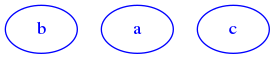

In [8]:
from sciprog import draw_dig
draw_dig(g)

Adding a vertex twice does nothing:

In [9]:
g.add_vertex('a')
print(g)


a: []
b: []
c: []



Once you added the verteces, you can start adding directed edges among them with the method `add_edge`:

```python
    def add_edge(self, vertex1, vertex2):
        """ Adds an edge to the graph, from vertex1 to vertex2
        
            If verteces don't exist, raises an Exception.
            If there is already such an edge, exits silently.            
        """
        
        if not vertex1 in self._edges:
            raise Exception("Couldn't find source vertex:" + str(vertex1))

        if not vertex2 in self._edges:
            raise Exception("Couldn't find target vertex:" + str(vertex2))        
            
        if not vertex2 in self._edges[vertex1]:
            self._edges[vertex1].append(vertex2)

```

In [10]:
g.add_edge('a', 'c')
print(g)


a: ['c']
b: []
c: []



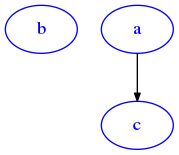

In [11]:
draw_dig(g)

In [12]:
g.add_edge('a', 'b')
print(g)


a: ['c', 'b']
b: []
c: []



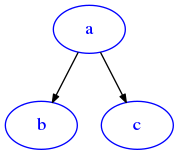

In [13]:
draw_dig(g)

Adding an edge twice makes no difference:

In [14]:
g.add_edge('a', 'b')
print(g)


a: ['c', 'b']
b: []
c: []



Notice a `DiGraph` can have self-loops too (also called _caps_):

In [15]:
g.add_edge('b', 'b')
print(g)


a: ['c', 'b']
b: ['b']
c: []



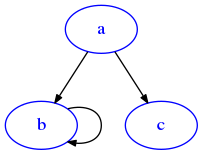

In [16]:
draw_dig(g)

### 0.5.2 dig()

`dig()` is a shortcut to build graphs, it is already provided and you don't need to implement it.

**USE IT ONLY WHEN TESTING, *NOT* IN THE `DiGraph` CLASS CODE !!!!  **

First of all, remember to import it from `graph_test` package:

In [17]:
from graph_test import dig

With empty dict prints the empty graph:

In [18]:
print(dig({}))


DiGraph()


To build more complex graphs, provide a dictionary with pairs source vertex / target verteces list  like in the following examples:        

In [19]:
print(dig({'a':['b','c']}))


a: ['b', 'c']
b: []
c: []



In [20]:
print(dig({'a': ['b','c'],
           'b': ['b'],
           'c': ['a']}))


a: ['b', 'c']
b: ['b']
c: ['a']



### 0.6 Equality

Graphs for us are equal irrespectively of the order in which elements in adjacency lists are specified. So for example 
these two graphs will be considered equal:

In [21]:
dig({'a': ['c', 'b']}) == dig({'a': ['b', 'c']})

True


### 0.7 Basic querying

There are some provided methods to query the `DiGraph`: `adj`, `verteces`, `is_empty`

### 0.7.1 adj

To obtain the edges, you can use the method `adj(self, vertex)`. It is already provided and you don't need to implement it:
```python
    def adj(self, vertex):
        """ Returns the verteces adjacent to vertex. 
            
            NOTE: verteces are returned in a NEW list.
            Modifying the list will have NO effect on the graph!
        """
        if not vertex in self._edges:
            raise Exception("Couldn't find a vertex " + str(vertex))
        
        return self._edges[vertex][:]

```

In [22]:
lst = dig({'a': ['b', 'c'],
           'b': ['c']}).adj('a')
print(lst)

['b', 'c']


Let's check we actually get back a new list (so modifying the old one won't change the graph):

In [23]:
lst.append('d')
print(lst)

['b', 'c', 'd']


In [24]:
print(g.adj('a'))

['c', 'b']


**NOTE**: This technique of giving back copies is also called _defensive copying_: it prevents users from modifying the 
internal data structures of a class instance in an uncontrolled manner. For example, if we allowed them direct access to the internal verteces list, they could add duplicate edges, which we don't allow in our model.
If instead we only allow users to add edges by calling `add_edge`, we are sure the constraints for our model will always remain satisfied.

### 0.7.2 is_empty()

We can check if a `DiGraph` is empty. It is already provided and you don't need to implement it:

```python
    def is_empty(self):
        """  A DiGraph for us is empty if it has no verteces and no edges """
        
        return len(self._edges) == 0
```

In [25]:
print(dig({}).is_empty())

True


In [26]:
print(dig({'a':[]}).is_empty())

False


### 0.7.3 verteces()

To obtain the verteces, you can use the function `verteces`. (NOTE for Italians: method is called vert**e**c**e**s, with two **e**s !!!). It is already provided and you don't need to implement it:

```python
    def verteces(self):
        """ Returns a set of the graph verteces. Verteces can be any object. """
        
        # Note dict keys() return a list, not a set. Bleah.  
        # See http://stackoverflow.com/questions/13886129/why-does-pythons-dict-keys-return-a-list-and-not-a-set
        return set(self._edges.keys()) 
```

In [27]:
g = dig({'a': ['c', 'b'],
         'b': ['c']})
print(g.verteces())

{'b', 'a', 'c'}


Notice it returns a _set_, as verteces are stored as keys in a dictionary, so they are not supposed to be in any particular order. When you print the whole graph you see them vertically ordered though, for clarity purposes:

In [28]:
print(g)


a: ['c', 'b']
b: ['c']
c: []



Verteces in the edges list are instead stored and displayed in the order in which they were inserted.

### 0.8 Blow up your computer

Try to call the already implemented function `graph_test.gen_graphs` with small numbers for `n`, like _1_, _2_ , _3_ , _4_ .... Just with _2_ we get back a lot of graphs:

```python

def gen_graphs(n):    
    """ Returns a list with all the possible 2^(n^2) graphs of size n 
    
        Verteces will be identified with numbers from 1 to n 
    """    

```

In [29]:
from graph_test import gen_graphs
print(gen_graphs(2))

[
1: []
2: []
, 
1: []
2: [2]
, 
1: []
2: [1]
, 
1: []
2: [1, 2]
, 
1: [2]
2: []
, 
1: [2]
2: [2]
, 
1: [2]
2: [1]
, 
1: [2]
2: [1, 2]
, 
1: [1]
2: []
, 
1: [1]
2: [2]
, 
1: [1]
2: [1]
, 
1: [1]
2: [1, 2]
, 
1: [1, 2]
2: []
, 
1: [1, 2]
2: [2]
, 
1: [1, 2]
2: [1]
, 
1: [1, 2]
2: [1, 2]
]



<div class="alert alert-info"> 

**QUESTION**: What happens if you call `gen_graphs(10)` ? How many graphs do you get back ?
</div>



## 1. Implement building

Enough for talking! Let's implement building graphs.

### 1.1 has_edge

Implement this method in `DiGraph`: 

```python
    def has_edge(self, source, target):
        """  Returns True if there is an edge between source vertex and target vertex. 
             Otherwise returns False.

            If either source, target or both verteces don't exist raises an Exception.
        """
        
        raise Exception("TODO IMPLEMENT ME!")                             
```
**Testing**: `python3 -m unittest graph_test.HasEdgeTest`

### 1.2 full_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def full_graph(verteces):
    """ Returns a DiGraph which is a full graph with provided verteces list.
    
        In a full graph all verteces link to all other verteces (including themselves!).
    """
    
    raise Exception("TODO IMPLEMENT ME!")
```    

**Testing**: `python3 -m unittest graph_test.FullGraphTest`

### 1.3 dag

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def dag(verteces):
    """ Returns a DiGraph which is DAG (Directed Acyclic Graph) made out of provided verteces list
    
        Provided list is intended to be in topological order.
        NOTE: a DAG is ACYCLIC, so caps (self-loops) are not allowed !!
    """

    raise Exception("TODO IMPLEMENT ME!")
```

**Testing**: `python3 -m unittest graph_test.DagTest`

### 1.4 list_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def list_graph(n):
    """ Return a graph of n verteces displaced like a 
        monodirectional list:  1 -> 2 -> 3 -> ... -> n 
        
        Each vertex is a number i, 1 <= i <= n  and has only one edge connecting it
        to the following one in the sequence        
        If n = 0, return the empty graph.
        if n < 0, raises an Exception.
    """    
        
    raise Exception("TODO IMPLEMENT ME!")
```

**Testing**: `python3 -m unittest graph_test.ListGraphTest`

### 1.5 star_graph

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def star_graph(n):
    """ Returns graph which is a star with n nodes 

        First node is the center of the star and it is labeled with 1. This node is linked 
        to all the others. For example, for n=4 you would have a graph like this:
        
                3
                ^
                |    
           2 <- 1 -> 4           
           
        If n = 0, the empty graph is returned
        If n < 0, raises an Exception           
    """    
    
    raise Exception("TODO IMPLEMENT ME!")    
```

**Testing**: `python3 -m unittest graph_test.StarGraphTest`

### 1.6 odd_line

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def odd_line(n):
    """ Returns a DiGraph with n verteces, displaced like a line of odd numbers

        Each vertex is an odd number i, for  1 <= i < 2n. For example, for
        n=4 verteces are displaced like this:

        1 -> 3 -> 5 -> 7

        For n = 0, return the empty graph

    """
```

**Testing**: `python3 -m unittest graph_test.OddLineTest`

**Example usage**:

In [30]:
odd_line(0)


DiGraph()

In [31]:
odd_line(1)


1: []

In [32]:
 odd_line(2)


1: [3]
3: []

In [33]:
odd_line(3)


1: [3]
3: [5]
5: []

In [34]:
odd_line(4)


1: [3]
3: [5]
5: [7]
7: []

### 1.7 even_line

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def even_line(n):
    """ Returns a DiGraph with n verteces, displaced like a line of even numbers

        Each vertex is an even number i, for  2 <= i <= 2n. For example, for
        n=4 verteces are displaced like this:

        2 <- 4 <- 6 <- 8

        For n = 0, return the empty graph

    """
```

**Testing**: `python3 -m unittest graph_test.EvenLineTest`

**Example usage**: 

In [35]:
even_line(0)


DiGraph()

In [36]:
even_line(1)


2: []

In [37]:
 even_line(2)


2: []
4: [2]

In [38]:
even_line(3)


2: []
4: [2]
6: [4]

### 1.8 quads

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def quads(n):
    """ Returns a DiGraph with 2n verteces, displaced like a strip of quads.

        Each vertex is a number i,  1 <= i <= 2n. 
        For example, for n = 4, verteces are displaced like this:

        1 -> 3 -> 5 -> 7
        ^    |    ^    |
        |    ;    |    ;
        2 <- 4 <- 6 <- 8

        where 

          ^                                         |
          |  represents an upward arrow,   while    ;  represents a downward arrow        

    """
```

**Testing**: `python3 -m unittest graph_test.QuadsTest`

**Example usage**: 

In [39]:
quads(0)


DiGraph()

In [40]:
quads(1)


1: []
2: [1]

In [41]:
quads(2)


1: [3]
2: [1]
3: [4]
4: [2]

In [42]:
quads(3)


1: [3]
2: [1]
3: [5, 4]
4: [2]
5: []
6: [4, 5]

In [43]:
quads(4)


1: [3]
2: [1]
3: [5, 4]
4: [2]
5: [7]
6: [4, 5]
7: [8]
8: [6]

### 1.9 pie

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !

```python
def pie(n):
    """
        Returns a DiGraph with n+1 verteces, displaced like a polygon with a perimeter 
        of n verteces progressively numbered from 1 to n. 
        A central vertex numbered zero has outgoing edges to all other verteces.

        For n = 0, return the empty graph.
        For n = 1, return vertex zero connected to node 1, and node 1 has a self-loop.

    """
```

**Testing**: `python3 -m unittest graph_test.PieTest`

**Example usage**: 

For `n=5`, the function creates this graph:

In [44]:
pie(5)


0: [1, 2, 3, 4, 5]
1: [2]
2: [3]
3: [4]
4: [5]
5: [1]

![](img/pie.png)

**Degenerate cases:**

In [45]:
pie(0)


DiGraph()

In [46]:
pie(1)


0: [1]
1: [1]

### 1.10 Flux Capacitor

A _Flux Capacitor_ is a plutonium-powered device that enables time travelling. During the 80s it was installed on a Delorean car and successfully used to ride humans back and forth across centuries:

![](img/flux-capacitor.jpg)

In this exercise you will build a Flux Capacitor model as a Y-shaped `DiGraph`, created according to a parameter `depth`. Here you see examples at different depths:

![](img/flux-capacitor-graph.png)

Implement this function **outside** the class definition. It is **not** a method of `DiGraph` !


```python
def flux(depth):
    """ Returns a DiGraph with 1 + (d * 3) numbered verteces displaced like a Flux Capacitor:

        - from a central node numbered 0, three branches depart  
        - all edges are directed outward
        - on each branch there are 'depth' verteces. 
        - if depth < 0, raises a ValueError 

        For example, for depth=2 we get the following graph (suppose arrows point outward):

             4         5
              \       /
               1     2
                \   /
                  0
                  |
                  3
                  |
                  6


```

**Testing**: `python3 -m unittest graph_test.FluxTest`

**Example usage**: 

In [47]:
flux(0)


0: []

In [48]:
flux(1)


0: [1, 2, 3]
1: []
2: []
3: []

In [49]:
flux(2)


0: [1, 2, 3]
1: [4]
2: [5]
3: [6]
4: []
5: []
6: []

In [50]:
 flux(3)


0: [1, 2, 3]
1: [4]
2: [5]
3: [6]
4: [7]
5: [8]
6: [9]
7: []
8: []
9: []


## 2. Manipulate graphs

You will now implement some methods to manipulate graphs.

### 2.1 remove_vertex

```python
    def remove_vertex(self, vertex):
        """ Removes the provided vertex  and returns it
            
            If the vertex is not found, raises an Exception.
        """
```

**Testing**: `python3 -m unittest graph_test.RemoveVertexTest`


### 2.2 transpose


```python    
    def transpose(self):
        """ Reverses the direction of all the edges 
        
            NOTE: this method changes in-place the graph: does **not** create a new instance
            and does *not* return anything !!
            
            NOTE: To implement it *avoid* modifying the existing _edges dictionary (would
            probably more problems than anything else).
            Instead, create a new dictionary, fill it with the required 
            verteces and edges ad then set _edges to point to the new dictionary.

        """           
```

**Testing**: `python3 -m unittest graph_test.TransposeTest`



### 2.3 has_self_loops    

```python    

    def has_self_loops(self):
        """ Returns True if the graph has any self loop (a.k.a. cap), False otherwise """
```
**Testing**: `python3 -m unittest graph_test.HasSelfLoopsTest`
 

### 2.4 remove_self_loops    

```python    

    def remove_self_loops(self):
        """ Removes all of the self-loops edges (a.k.a. caps) 
            
            NOTE: Removes just the edges, not the verteces!
        """

```
**Testing**: `python3 -m unittest graph_test.RemoveSelfLoopsTest`


### 2.5 undir

```python
    def undir(self):
        """ Return a *NEW* undirected version of this graph, that is, if an edge a->b exists in this graph,
            the returned graph must also have both edges  a->b and b->a
            
            *DO NOT* modify the current graph, just return an entirely new one.
        """
```

**Testing**: `python3 -m unittest graph_test.UndirTest`



## 3. Query graphs 

You can query graphs the _Do it yourself_ way with Depth First Search (DFS) or Breadth First Search (BFS). 


Let's make a simple example: 

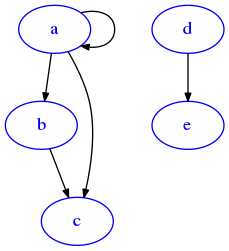

In [51]:
g = dig({'a': ['a','b', 'c'],
         'b': ['c'],
         'd': ['e']})

from sciprog import draw_dig
draw_dig(g)

In [52]:
g.dfs('a')

Stack is: ['a'] 
popping from stack: a
  not yet visited
  Scheduling for visit: a
  Scheduling for visit: b
  Scheduling for visit: c
Stack is : ['a', 'b', 'c'] 
popping from stack: c
  not yet visited
Stack is : ['a', 'b'] 
popping from stack: b
  not yet visited
  Scheduling for visit: c
Stack is : ['a', 'c'] 
popping from stack: c
  already visited!
popping from stack: a
  already visited!


Compare it wirh the example for the bfs : 

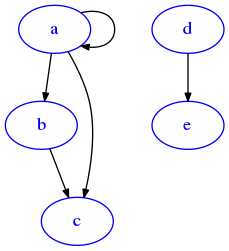

In [53]:
draw_dig(g)

In [54]:
g.bfs('a')

Removed from queue: a
  Found neighbor: a
    already visited
  Found neighbor: b
    not yet visited, enqueueing ..
  Found neighbor: c
    not yet visited, enqueueing ..
  Queue is: ['b', 'c'] 
Removed from queue: b
  Found neighbor: c
    already visited
  Queue is: ['c'] 
Removed from queue: c
  Queue is: [] 


Predictably, results are different.


### 3.1 distances()

Try to implement this method of `DiGraph`:

```python 
    def distances(self, source):
        """ 
        Returns a dictionary where the keys are verteces, and each vertex v is associated
        to the *minimal* distance in number of edges required to go from the source 
        vertex to vertex v. If node is unreachable, the distance will be -1
        
        Source has distance zero from itself
        Verteces immediately connected to source have distance one.

        if source is not a vertex, raises an Exception
        
        HINT: implement this using bfs search.
        """        
```

If you look at the following graph, you can see an example of the distances to associate to each vertex, supposing that the `source` is `a`. Note that `a` iself is at distance zero from itself and also that unreachable nodes like `f` and `g` will be at distance _-1_ :
    

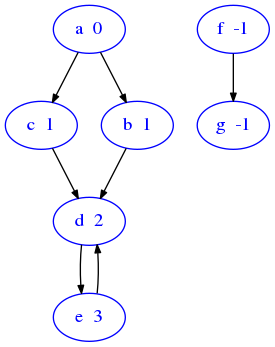

In [55]:
import sciprog
sciprog.draw_nx(sciprog.show_distances())

`distances('a')` called on this graph would return a map like this: 
```python
{
  'a':0,
  'b':1,
  'c':1,
  'd':2,
  'e':3,
  'f':-1,
  'g':-1,
  
}
```

### 3.2 Play with dfs and bfs

Create small graphs (like linked lists a->b->c, triangles, mini-full graphs, trees - you can also use the functions you defined to create graphs like `full_graph`, `dag`, `list_graph`, `star_graph`) and try to predict 
the visit sequence (verteces order, with discovery and finish times) you would have running a dfs or bfs. 
Then write tests that assert you actually get those sequences when running provided dfs and bfs



### 3.3 connected components

Implement `cc`:

```python
    def cc(self):
        """ Finds the connected components of the graph, returning a dict object
            which associates to the verteces the corresponding connected component 
            number id, where 1 <= id <= |V|  
        
            IMPORTANT:  ASSUMES THE GRAPH IS UNDIRECTED ! 
                        ON DIRECTED GRAPHS, THE RESULT IS UNPREDICTABLE !
            
            To develop this function, implement also _cc_rec
            
            HINT: store 'counter' as field in Visit object                        
        """

```

Which in turn uses `ccdfs`, also to implement inside the method: 

```python
        def ccdfs(counter, source, ids):
            """
                Performs a DFS from source vertex
                
                HINT: Copy in here the method from DFS and adapt it as needed       
                HINT: store the connected component id in VertexLog objects
            """
```

**Testing**: `python3 -m unittest graph_test.CCTest`

**NOTE**: In tests, to keep code compact graphs are created a call to `udig()`

In [56]:
from graph_test import udig

udig({'a': ['b'],
      'c': ['d']})


a: ['b']
b: ['a']
c: ['d']
d: ['c']

which makes sure the resulting graph is undirected as CC algorithm requires (so if there is one edge `a->b` there will also be another edge `b->a`)


### 3.4 has_cycle

Implement `has_cycle` method for directed graphs:

```python
        
    def has_cycle(self):
        """ Return True if this directed graph has a cycle, return False otherwise. 
        
            - To develop this function, implement also has_cycle_rec(u) inside this method
            - Inside has_cycle_rec, to reference variables of has_cycle you need to
              declare them as nonlocal like  
                 nonlocal clock, dt, ft
            - MUST be able to also detect self-loops
        """```

and also `has_cycle_rec` inside `has_cycle`:

```python 
    def has_cycle_rec(u):
        raise Exception("TODO IMPLEMENT ME !")
```

**Testing**:  `python3 -m unittest graph_test.HasCycleTest`


## 4. Do cool stuff with theory 

- find connected components
- determine if a graph is acyclic
- find node distances

In [57]:
# Ignore this cell
import graph_test
jupman.run(graph_test)

...........

Removed from queue: a
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from queue: 1
  Queue is: [] 
Removed from

    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    already visited
  Queue is: [2] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 1
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 1
    already visited
  Found neighbor: 3
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 1
    already visited
  Found neighbor: 2
    not yet visited, enqueueing ..
  Queue is: [2] 
Remove

  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [2, 3] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 2
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [2, 3] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 2
    already visited
  Found neighbor: 3
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [2, 3] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [3] 
Removed from 

    already visited
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 3
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 2
    not yet visited, enqueueing ..
  Queue is: [2] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    already visited
  Queue is: [2] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 3
    not yet visi

.....

  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [2, 3] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueueing ..
  Queue is: [2, 3] 
Removed from queue: 2
  Found neighbor: 1
    already visited
  Queue is: [3] 
Removed from queue: 3
  Found neighbor: 1
    already visited
  Found neighbor: 2
    already visited
  Found neighbor: 3
    already visited
  Queue is: [] 
Removed from queue: 1
  Found neighbor: 1
    already visited
  Found neighbor: 2
    not yet visited, enqueueing ..
  Found neighbor: 3
    not yet visited, enqueuei

  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  not yet visited
Stack is : [1] 
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 3
Stack is : [3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 2, 3] 
popping from stack: 3
  already visited!
popping from stack: 2
  not yet visited
Stack is : [1] 
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 3
Stack is : [3] 
popping from stack: 3
  not yet visited
Stack is : [] 
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 3
Stack is : [3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 3
Stack is : [3] 
popping from stack: 3
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 3
Stack is : [3] 
popping from s

Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
Stack is : [2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
Stack is : [2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
Stack is : [2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
Stack is : [2] 
popping from stack: 2
  not yet v

  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [2, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [2, 1, 3] 
popping from stack: 3
  already visited!
popping from stack: 1
  already visited!
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [1, 3] 
popping from stack: 3
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [2, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [2, 1, 2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [2, 1, 1, 3] 
popping from stack: 3
  already visited!
popping from stack: 1
  alr

Stack is : [1, 1, 2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
Stack is : [1, 1, 1] 
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [1, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 1, 2, 3] 
popping from stack: 3
  already visited!
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
Stack is : [1, 1, 1] 
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [1, 3] 
popping from stack: 3
  not yet visited
Stack is : [1] 
popping from stack: 1
  already visited!
Stack is: [1] 
popping 

Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [1, 1, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 2
Stack is : [1, 1, 2] 
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
Stack is : [1, 2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 3
Stack is : [1, 1, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 1, 2, 3] 
popping from stack: 3
  already visited!
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from 

...................................................................


popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 2, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 3
Stack is : [1, 2, 3] 
popping from stack: 3
  already visited!
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 1, 2, 3] 
popping from stack: 3
  already visited!
popping from stack: 2
  already visited!
popping from stack: 1
  already visited!
popping from stack: 1
  already visited!
Stack is: [1] 
popping from stack: 1
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack is : [1, 2, 3] 
popping from stack: 3
  not yet visited
  Scheduling for visit: 2
Stack is : [1, 2, 2] 
popping from stack: 2
  not yet visited
  Scheduling for visit: 1
  Scheduling for visit: 2
  Scheduling for visit: 3
Stack 


----------------------------------------------------------------------
Ran 83 tests in 1.082s

OK
